# Analysis of Performance of Planning Algorithms Tested Using the Evaluation Framework

This notebook contains plots which display the performance of different algorithms using the defined evaluation methodology.

Data recorded for each algorithm includes:
    

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("dark")

In [2]:
with open("evaluation_results.json") as json_data:
    data = json.load(json_data)
    json_data.close()

### Method to Plot Bar Charts Of Specific Attributes

In [3]:
def plot_barcharts_attribute(key):
    for algo in data:
        attribute = algo[key]
        attribute = [0 if v is None else v for v in attribute]
        index = range(len(attribute))

        plt.figure(figsize=(10, 5))
        plt.title(f"{key}: {algo['Algorithm']}")
        plt.bar(index, attribute)
        plt.show()

def plot_comparison_barchart(algo1, algo2, key):
    algo_found = 0
    bar_width = 0.35
    plt.figure(figsize=(10, 5))

    map_names = data[0]["Map Names"]
    index = range(len(map_names))

    for algo in data:
        if algo["Algorithm"] in [algo1, algo2]:
            algo_found += 1
            key_data = algo[key]
            key_data = [0 if v is None else v for v in key_data]

            if algo_found == 1:
                plt.bar(index, key_data, bar_width, label=algo["Algorithm"])
            else:
                plt.bar([i + bar_width for i in index], key_data, bar_width, label=algo["Algorithm"])
        else:
            next

    plt.xticks([i + bar_width / 2 for i in index], map_names, rotation=30, ha="center")
    plt.xlabel("Map Number")
    plt.ylabel(key)
    plt.title(f"Comparison of {key} between {algo1} and {algo2}")
    plt.legend()
    plt.show()

### Plot of Time Taken to Calculate Path

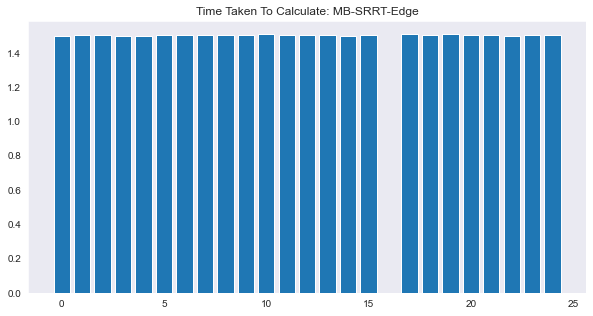

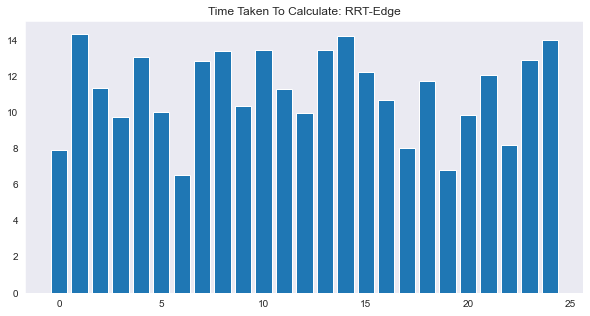

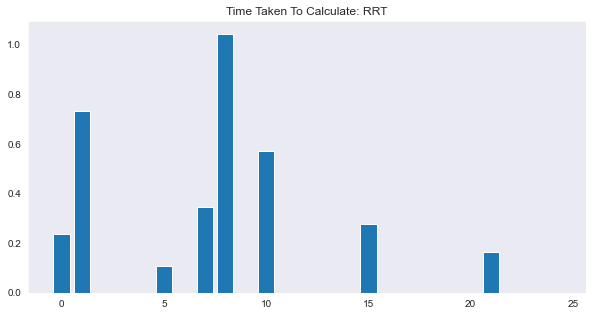

In [4]:
plot_barcharts_attribute("Time Taken To Calculate")

### Plot of Path Length

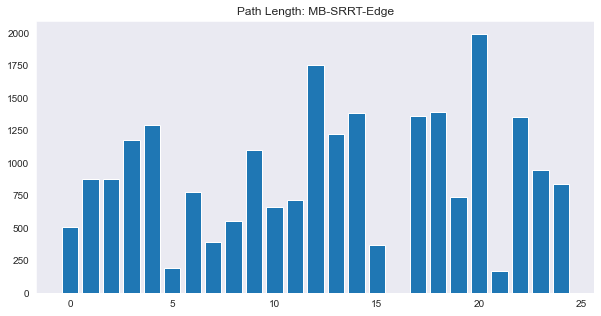

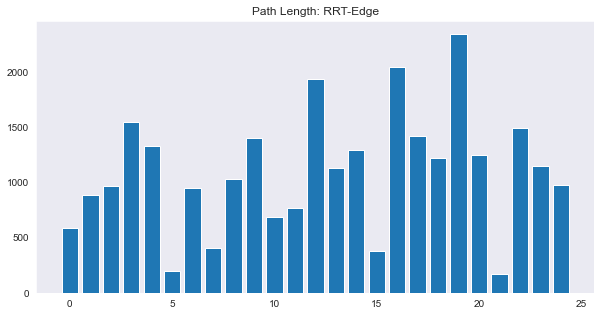

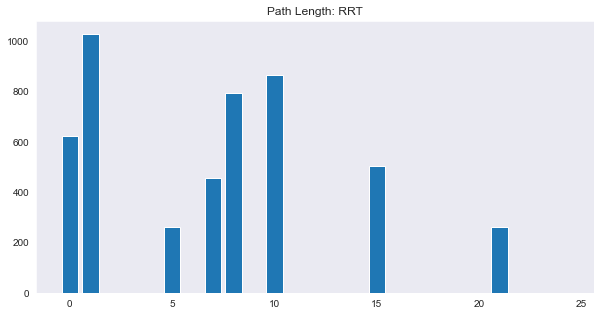

In [5]:
plot_barcharts_attribute("Path Length")

### Plot of Energy Consumption of Each Algorithm 

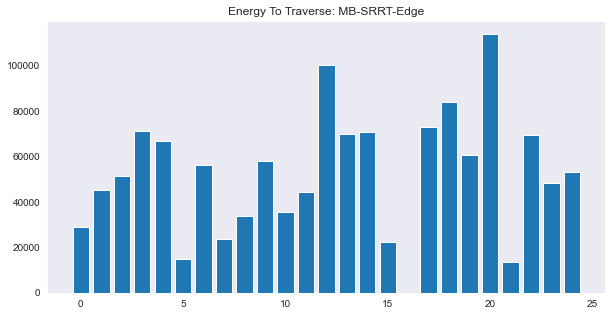

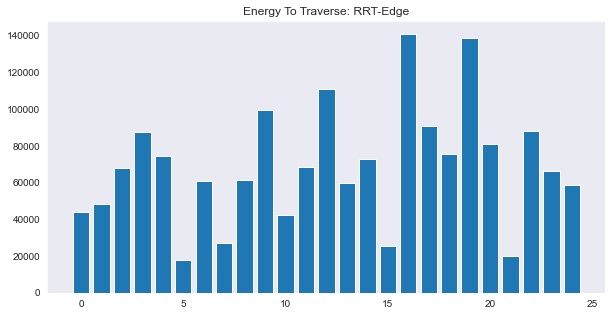

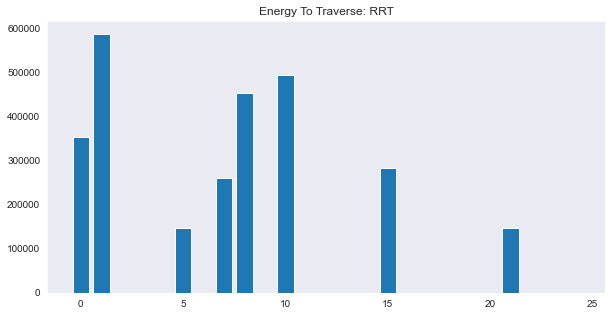

In [6]:
plot_barcharts_attribute("Energy To Traverse")

## Comparison of MB-SRRT-Edge to RRT-Edge

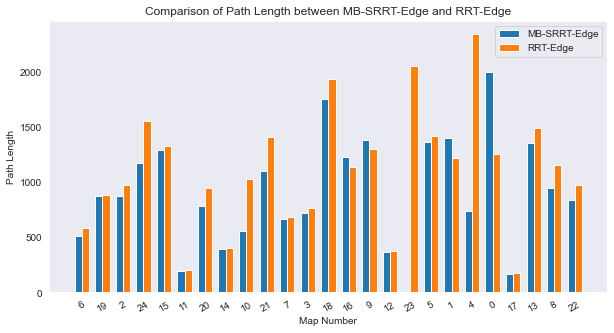

In [7]:
plot_comparison_barchart("MB-SRRT-Edge", "RRT-Edge", "Path Length")

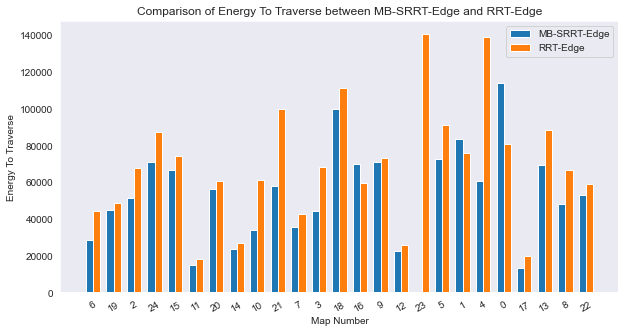

In [8]:
plot_comparison_barchart("MB-SRRT-Edge", "RRT-Edge", "Energy To Traverse")

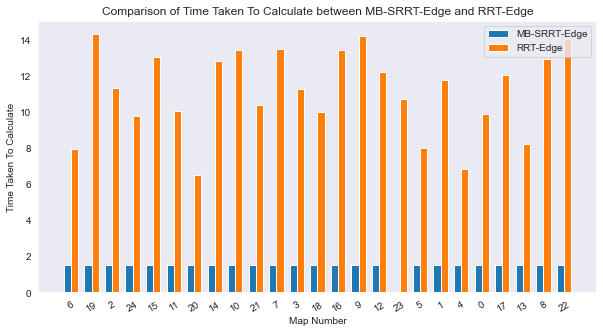

In [9]:
plot_comparison_barchart("MB-SRRT-Edge", "RRT-Edge", "Time Taken To Calculate")

As can be seen, whilst MB-SRRT-Edge and the anytime adaptation of RRT-Edge yeild similar results with respect to path length and energy consumption, RRT-Edge 

In [10]:
with open("Maps/2D/block_map_25/20.json") as json_data:
    data = json.load(json_data)
    json_data.close()

In [15]:
def display_dense_map(dense_map):
    # Extract grid, goal, and agent from the dense_map dictionary
    grid = np.array(dense_map['grid'])
    goal = dense_map['goal']
    agent = dense_map['agent']
    
    # Function to find rectangles of 1s in the grid
    def find_rectangles(grid):
        rectangles = []
        visited = np.zeros_like(grid, dtype=bool)
        for y in range(grid.shape[0]):
            for x in range(grid.shape[1]):
                if grid[y, x] == 1 and not visited[y, x]:
                    # Find the extent of the rectangle
                    rect_x, rect_y = x, y
                    while rect_x < grid.shape[1] and grid[y, rect_x] == 1:
                        rect_x += 1
                    while rect_y < grid.shape[0] and np.all(grid[rect_y, x:rect_x] == 1):
                        rect_y += 1
                    rectangles.append((x, y, rect_x - x, rect_y - y))
                    visited[y:rect_y, x:rect_x] = True
        return rectangles

    rectangles = find_rectangles(grid)
    print(rectangles)
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the rectangles
    for rect in rectangles:
        x, y, width, height = rect
        ax.add_patch(plt.Rectangle((x, y), width, height, color='black'))

    # Highlight the agent and goal positions
    ax.plot(agent[0], agent[1], 'bo', label='Agent')  # 'bo' stands for blue circle
    ax.plot(goal[0], goal[1], 'ro', label='Goal')    # 'ro' stands for red circle

    # Set the limits of the plot
    ax.set_xlim(-1, grid.shape[1])
    ax.set_ylim(-1, grid.shape[0])

    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()

[(875, 58, 89, 89), (112, 144, 123, 825), (829, 165, 10, 707), (431, 166, 38, 46), (263, 182, 11, 11), (660, 294, 5, 7), (235, 406, 151, 332), (755, 513, 125, 359), (618, 659, 262, 213), (905, 846, 19, 26), (618, 872, 153, 32), (803, 918, 7, 21)]


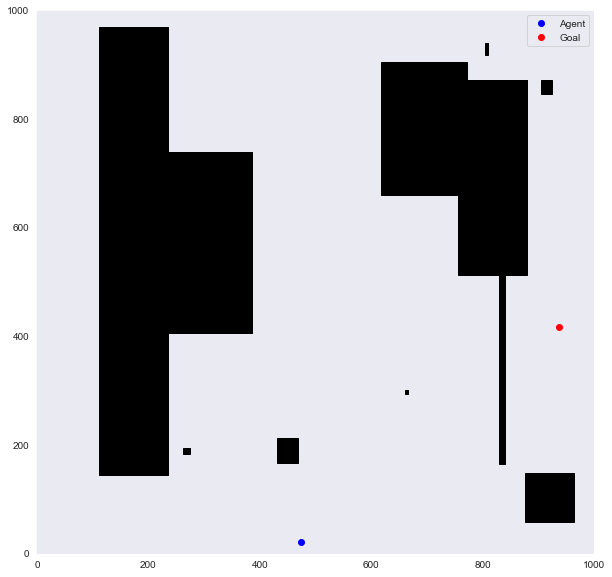

In [16]:
display_dense_map(data)